In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def laplacian(matrix):
    convolved = np.zeros((len(matrix), len(matrix)))
    for x in range(len(matrix)):
        for y in range(len(matrix[0])):
            top = matrix[(x - 1) % len(matrix), y]
            bottom = matrix[(x + 1) % len(matrix), y]
            left = matrix[x, (y - 1) % len(matrix)]
            right = matrix[x, (y + 1) % len(matrix)]
            
            convolved[x, y] = top + bottom + left + right - 4 * matrix[x, y]
    return convolved

In [3]:
'''
Previously tried to calculate the entire Gray-Scott model at once, but caused the final outcome to appear
blurry. Separating the calculations greatly improved the final resolution.
'''
def gray_scott(A, B, DA, DB, f, k, delta_t):
    lap_a = laplacian(A)
    lap_b = laplacian(B)
    
    diff_A = (DA*lap_a - A*B**2 + f*(1-A)) * delta_t
    diff_B = (DB*lap_b + A*B**2 - (k+f)*B) * delta_t
    
    A += diff_A
    B += diff_B
    
    return A, B

In [4]:
def draw(A,B):
    """draw the concentrations"""
    fig, ax = plt.subplots(1,2,figsize=(12,20))
    ax[0].imshow(A, interpolation='nearest', cmap='magma')
    ax[1].imshow(B, interpolation='nearest', cmap='magma')
    ax[0].set_title('A')
    ax[1].set_title('B')
    ax[0].axis('off')
    ax[1].axis('off')

In [5]:
# Da, Db, f, k, dt = 0.16, 0.08, 0.03368, 0.05652, 1.0 # for sponge growth
# Da, Db, f, k, dt = 0.16, 0.08, 0.0545, 0.062, 1.0 # for coral

total_t = 5000

size = 100

A = np.zeros((size, size))
B = np.zeros((size, size))

quarter = size // 4
half = size // 2
radius = size // 10

# initial conditions
A[quarter-radius:quarter+radius, quarter-radius:quarter+radius] = 0.8
A[half+quarter-radius:half+quarter+radius, half+quarter-radius:half+quarter+radius] = 0.8


B[quarter-radius:quarter+radius, quarter-radius:quarter+radius] = 0.2
B[half+quarter-radius:half+quarter+radius, half+quarter-radius:half+quarter+radius] = 0.2




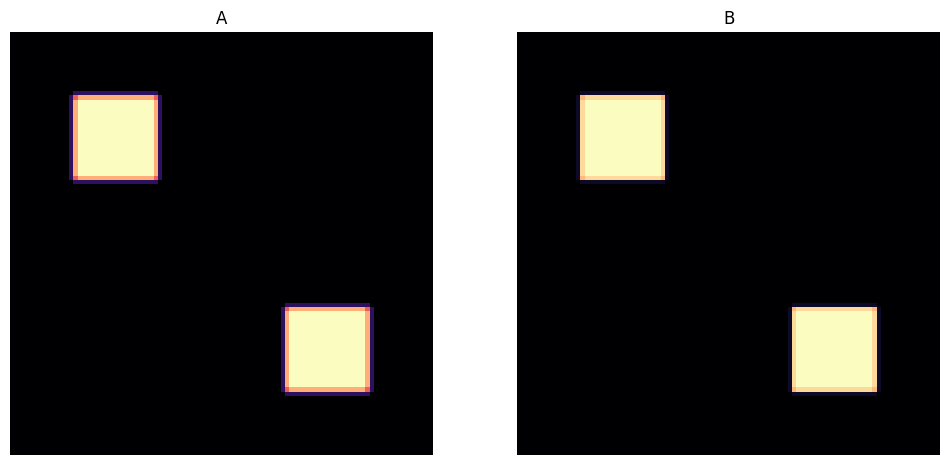

In [6]:
# uncomment strictly for recording the animation

# from matplotlib.animation import FFMpegWriter
# metadata = dict(title='Reaction-Diffusion Simulation, Mitosis', artist='Matplotlib',comment='please work')
# writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)
# fig, ax = plt.subplots(1,2,figsize=(12,10))

# with writer.saving(fig, "animation2.mp4", dpi=200):

#     for i in range(total_t):
#         A , B = gray_scott(A, B, Da, Db, f, k, dt)
#         if (i%100 == 0):
#             ax[0].imshow(A, interpolation='nearest', cmap='magma')
#             ax[1].imshow(B, interpolation='nearest', cmap='magma')
#             ax[0].set_title('A')
#             ax[1].set_title('B')
#             ax[0].axis('off')
#             ax[1].axis('off')
#             plt.pause(0.01)
#             writer.grab_frame()
    